In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
crime = pd.read_csv('F:\\Data Science\\Data sets\\crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
#crime['Place'] = crime['Unnamed: 0']
#crime
crime.rename(columns ={'Unnamed: 0':'Place'}, inplace = True)
crime

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
#EDA 
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

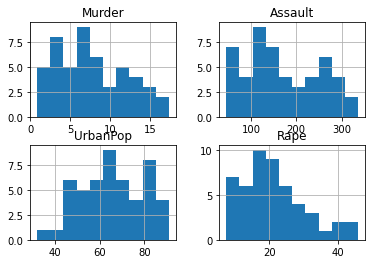

In [6]:
crime.hist()

<AxesSubplot:>

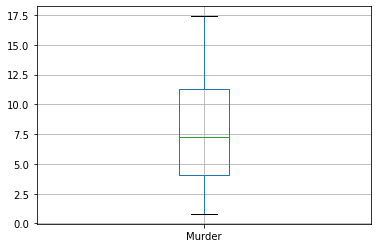

In [7]:
crime.boxplot(column =['Murder'])

<AxesSubplot:>

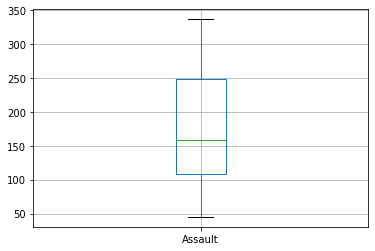

In [8]:
crime.boxplot(column =['Assault'])


<AxesSubplot:>

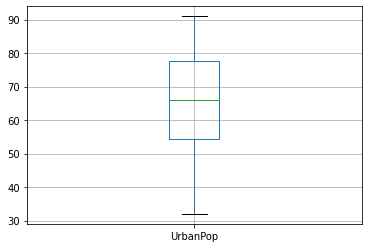

In [9]:
crime.boxplot(column =['UrbanPop'])

<AxesSubplot:>

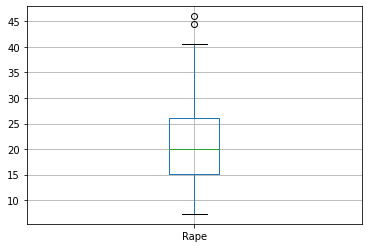

In [10]:
crime.boxplot(column =['Rape'])

<AxesSubplot:xlabel='Murder', ylabel='Density'>

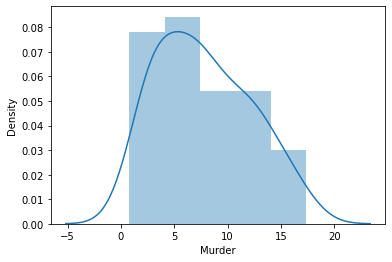

In [11]:
sns.distplot(crime['Murder'])

<AxesSubplot:xlabel='Assault', ylabel='Density'>

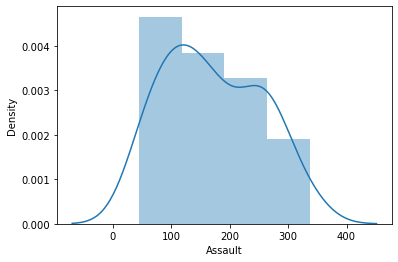

In [12]:
sns.distplot(crime['Assault'])

<AxesSubplot:xlabel='UrbanPop', ylabel='Density'>

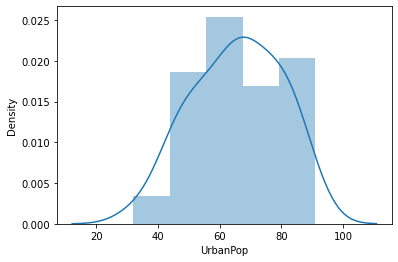

In [13]:
sns.distplot(crime['UrbanPop'])

<AxesSubplot:xlabel='Rape', ylabel='Density'>

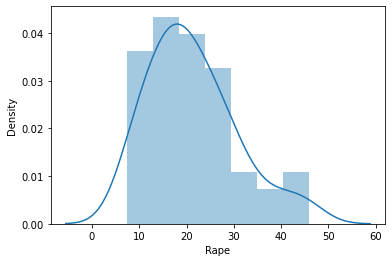

In [14]:
sns.distplot(crime['Rape'])

In [15]:
# Normalization function
def minmax_func(i):
    x = i-i.min()/(i.max() - i.min())
    return(x)

In [16]:
df_norm =  minmax_func(crime.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,13.151807,235.84589,57.457627,21.01137
1,9.951807,262.84589,47.457627,44.31137
2,8.051807,293.84589,79.457627,30.81137
3,8.751807,189.84589,49.457627,19.31137
4,8.951807,275.84589,90.457627,40.41137
5,7.851807,203.84589,77.457627,38.51137
6,3.251807,109.84589,76.457627,10.91137
7,5.851807,237.84589,71.457627,15.61137
8,15.351807,334.84589,79.457627,31.71137
9,17.351807,210.84589,59.457627,25.61137


### Hierarchical Clustering

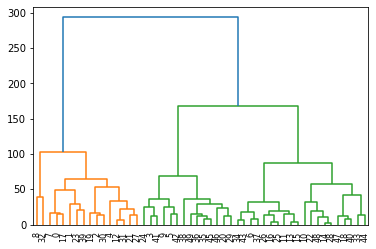

In [17]:
#creat dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method= 'complete'))


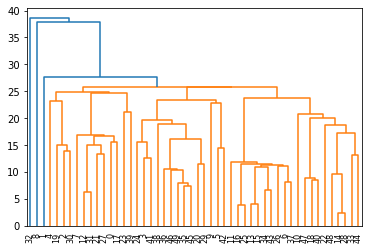

In [18]:
dendrogram1 = sch.dendrogram(sch.linkage(df_norm, method='single'))

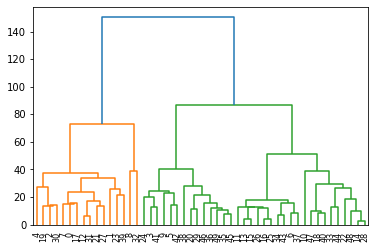

In [19]:
dendrogram2 = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

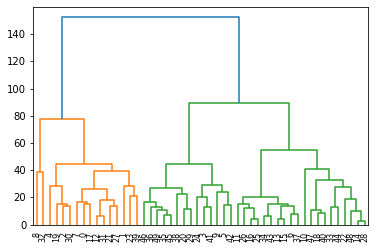

In [20]:
denderogram3 = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [21]:
hc = AgglomerativeClustering(n_clusters= 3, affinity = 'euclidean', linkage= 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [22]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [23]:
Clusters = pd.DataFrame(y_hc, columns =['Clusters'])

In [24]:
Clusters

,Clusters
0,0
1,0
2,0
3,2
4,0
5,2
6,1
7,0
8,0
9,2


In [25]:
Clusters.value_counts()

Clusters
1           20
0           16
2           14
dtype: int64

In [26]:
crime['h_Clusters'] = Clusters
crime

,Place,Murder,Assault,UrbanPop,Rape,h_Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


In [27]:
crime['h_Clusters'] = crime['h_Clusters'].replace(0, 'Cluster 1')
crime['h_Clusters'] = crime['h_Clusters'].replace(1, 'Cluster 2')
crime['h_Clusters'] = crime['h_Clusters'].replace(2, 'Cluster 3')
crime

,Place,Murder,Assault,UrbanPop,Rape,h_Clusters
0,Alabama,13.2,236,58,21.2,Cluster 1
1,Alaska,10.0,263,48,44.5,Cluster 1
2,Arizona,8.1,294,80,31.0,Cluster 1
3,Arkansas,8.8,190,50,19.5,Cluster 3
4,California,9.0,276,91,40.6,Cluster 1
5,Colorado,7.9,204,78,38.7,Cluster 3
6,Connecticut,3.3,110,77,11.1,Cluster 2
7,Delaware,5.9,238,72,15.8,Cluster 1
8,Florida,15.4,335,80,31.9,Cluster 1
9,Georgia,17.4,211,60,25.8,Cluster 3


In [28]:
crime.groupby('h_Clusters').mean()

,Murder,Assault,UrbanPop,Rape
h_Clusters,,,,
Cluster 1,11.812500,272.562500,68.312500,28.375000
Cluster 2,4.270000,87.550000,59.750000,14.390000
Cluster 3,8.214286,173.285714,70.642857,22.842857


The difference of 2 clusters of any column is of good difference. 

### K Means

In [29]:
crimes = pd.read_csv('F:\\Data Science\\Data sets\\crime_data.csv')
crimes.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [30]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crimes_df = scaler.fit_transform(crimes.iloc[:,1:])

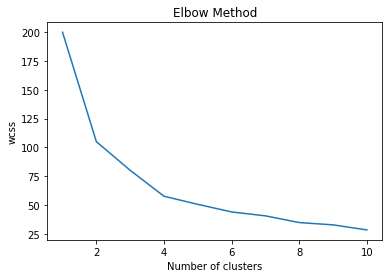

In [31]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state =0)
    kmeans.fit(scaled_crimes_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [32]:
clusters_new = KMeans(4, random_state = 0)
clusters_new.fit(scaled_crimes_df)

KMeans(n_clusters=4, random_state=0)

In [33]:
clusters_new.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [34]:
crimes['K_Clusters'] = clusters_new.labels_
crimes.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,K_Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


In [35]:
crimes['K_Clusters'] = crimes['K_Clusters'].replace(0, 'Cluster 1')
crimes['K_Clusters'] = crimes['K_Clusters'].replace(1, 'Cluster 2')
crimes['K_Clusters'] = crimes['K_Clusters'].replace(2, 'Cluster 3')
crimes['K_Clusters'] = crimes['K_Clusters'].replace(3, 'Cluster 4')
crimes

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,K_Clusters
0,Alabama,13.2,236,58,21.2,Cluster 4
1,Alaska,10.0,263,48,44.5,Cluster 2
2,Arizona,8.1,294,80,31.0,Cluster 2
3,Arkansas,8.8,190,50,19.5,Cluster 4
4,California,9.0,276,91,40.6,Cluster 2
5,Colorado,7.9,204,78,38.7,Cluster 2
6,Connecticut,3.3,110,77,11.1,Cluster 1
7,Delaware,5.9,238,72,15.8,Cluster 1
8,Florida,15.4,335,80,31.9,Cluster 2
9,Georgia,17.4,211,60,25.8,Cluster 4


In [36]:
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [37]:
crimes.groupby('K_Clusters').agg(['mean']).reset_index()

,K_Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,Cluster 1,5.656250,138.875000,73.875000,18.781250
1,Cluster 2,10.815385,257.384615,76.000000,33.192308
2,Cluster 3,3.600000,78.538462,52.076923,12.176923
3,Cluster 4,13.937500,243.625000,53.750000,21.412500


### DBSCAN

In [72]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [39]:
df = pd.read_csv('F:\\Data Science\\Data sets\\crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [41]:
df.drop(['Unnamed: 0'], axis = 1, inplace =True)

In [43]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [46]:
array = df.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [93]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [362]:
dbscan = DBSCAN(eps =1.2, min_samples = 7)
dbscan.fit(X)

DBSCAN(eps=1.2, min_samples=7)

In [363]:
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [364]:
D_clusters = pd.DataFrame(dbscan.labels_,columns=['D_clusters'])
D_clusters

,D_clusters
0,-1
1,-1
2,-1
3,0
4,-1
5,-1
6,0
7,0
8,-1
9,-1


In [365]:
df['D_cluster'] =pd.DataFrame(dbscan.labels_)
df.head()

,Murder,Assault,UrbanPop,Rape,cluster,D_cluster
0,13.2,236,58,21.2,-1,-1
1,10.0,263,48,44.5,-1,-1
2,8.1,294,80,31.0,-1,-1
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,-1,-1


In [366]:
df['D_cluster'].value_counts()

 0    31
-1    19
Name: D_cluster, dtype: int64

In [367]:
(len(df[df['D_cluster']==-1])/len(df))*100

38.0

In [368]:
Y = metrics.silhouette_score(X, dbscan.labels_)
Y

0.4047944502519567

In [369]:
def dbscan(Y, eps, min_samples):
    ss= StandardScaler()
    db = DBSCAN(eps=eps, min_samples = min_samples)
    db.fit(Y)
    y_pred = db.fit_predict(Y)
    plt.scatter(Y[:,0], Y[:,1], c=y_pred, cmap= 'Paired')
    plt.title('DBSCAN')

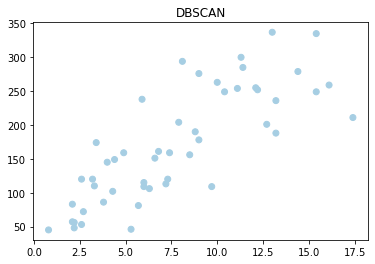

In [371]:
dbscan(array, 1.2, 7)